<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#buoyancy-flux-in-a-cloudy-boundary-layer" data-toc-modified-id="buoyancy-flux-in-a-cloudy-boundary-layer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>buoyancy flux in a cloudy boundary layer</a></span></li></ul></div>

In [9]:
import site
from pathlib import Path
import sys
from add_path import add_path
add_path()
import a500
print(f'imported {a500.__path__[0]}')

adding /Users/phil/repos/atsc500 to sys.path
imported /Users/phil/repos/atsc500/a500


# buoyancy flux in a cloudy boundary layer

We want to find $A_w, B_w, A_d$ and $B_d$ such that out of cloud:

$$\overline{w^\prime\theta_v^\prime}=A_d\overline{w^\prime\theta_l^\prime}+B_d\overline{w^\prime q_v^\prime} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (1),\\[5mm]$$

while in cloud:



$$\overline{w^\prime\theta_v^\prime}=A_w\overline{w^\prime\theta_l^\prime}+B_w\overline{w^\prime q_t^\prime} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ (2),\\[5mm]$$


where $A_d=1+0.61\overline{q_v}$ and $B_d=0.61\overline{\theta}$,

and

$$\begin{aligned}
&A_w=\frac{1+\frac{\overline{q_s}}{\epsilon}-\overline{q_t}+\frac{\overline{\theta}}{\epsilon}\left(\frac{dq_s}{dT}\right)}{1+\frac{L_v}{c_p}\left(\frac{dq_s}{dT}\right)},\\[2mm]
&B_w=A_w\left(\frac{L_v}{c_p}\right)-\overline{\theta}.
\end{aligned}\\[5mm]$$


- Starting with the definition of $T_v$ (Stull equation 1.5.1a) derive equation 5.15 (p. 51) assuming constant pressure.

- Hand in a notebook that uses equations 5.18,  5.29 and 5.30 to evaluate $A_d$, $B_d$, $A_w$ and $B_w$ at a pressure of 900 hPa, temperature of 280 K, $q_s$ = 7 g/kg, $L_v$ = $2.485 \times 10^{6}$ J/kg, $R_v$ = 461.5 J/kg/K, $q_v$ = $q_s$.



In [2]:
from add_path import add_path
add_path()

def calc_w(theta, qv, press):
    """
    Parameters
    ----------
    
    theta: float
       potential temperature (K)
    
    qv: float
       saturation mixing ratio (kg/kg)
       
    press: float
       pressure (kPa)
       
    Returns
    -------
    
    Aw, Bw: (floats)
       buoyancy flux coefficients assuming saturation
       
    """
    epsilon_i = 0.61
    epsilon = 1/(1 + epsilon_i)
    P0 = 100 # kPa
    T = theta/((P0/press)**(0.286))
    Lv = 2.485e6
    Rv = 461.5
    cp = 1004
    dqdt = (qv*Lv)/(Rv*T**2)
    Aw = (1 + qv/epsilon - qv + theta/epsilon*dqdt)/(1+Lv/cp*dqdt)
    Bw = Aw*(Lv/cp) - theta
    return Aw,Bw

def calc_d(theta, qv):
    """
    Parameters
    ----------
    
    theta: float
       potential temperature (K)
    
    qv: float
       saturation mixing ratio (kg/kg)
       
    Returns
    -------
    
    Ad, Bd: (floats)
       buoyancy flux coefficients assuming subsaturation
    """
    
    epsilon_i = 0.61
    Ad = 1 + epsilon_i*qv
    Bd = epsilon_i*theta
    return Ad,Bd


from a500.thermo.thermfuncs import find_theta, find_rs
press=90.  #kPa
Temp = 280. #K
theta = find_theta(Temp,press)
qv = find_rs(Temp,press)
print(calc_d(theta,qv))
print(calc_w(theta,qv,press))

adding /Users/phil/repos/atsc500 to sys.path
(1.0042215322495982, 176.06215918335454)
(0.5629729935907634, 1104.7877416799536)


In [8]:
import numpy as np
from add_path import add_path
add_path()

from a500.thermo import thermfuncs as tf
import pandas as pd

Temp=280. #K
press=90. #kPa
#
# find the saturation mixing ratio and potential temp from the temperature and pressure
#
print(tf.qs_tp(Temp,press))
print(tf.theta(Temp,press))
#
# find the dew point temperature and the lifting condensation level
#
psurf=100.  #kPa
Tsurf=290.
qvap=7.e-3  #kg/kg
Tdew = tf.tmr(qvap,psurf)
print('the surface dew point temp is: ',Tdew)
LCL = tf.LCL(Tdew,Tsurf,psurf)
print('the LCL is {:5.2f} kPa'.format(LCL))

#
# find thetal 
#
thetal = tf.alt_thetal(psurf,Tsurf,qvap)
#
# invert thetal for temperature, vapor, liquid -- uos means "unsaturated or saturated"
#
print(tf.t_uos_thetal(thetal,qvap,80.))
#
# make a sounding
#
press_levs=np.linspace(80,100.,20.)
press_levs=press_levs[::-1]
sounding=[]
for press in press_levs:
    sounding.append(tf.t_uos_thetal(thetal,qvap,press))
    
df_sounding=pd.DataFrame.from_records(sounding)


adding /Users/phil/repos/atsc500 to sys.path
0.006878545461638349
288.62649046451565
the surface dew point temp is:  281.7179908997351
the LCL is 88.45 kPa
{'T': 277.1442866562899, 'RL': 0.000615171037086892, 'X': 1, 'RV': 0.006384828962913108}


/Users/phil/ma36/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


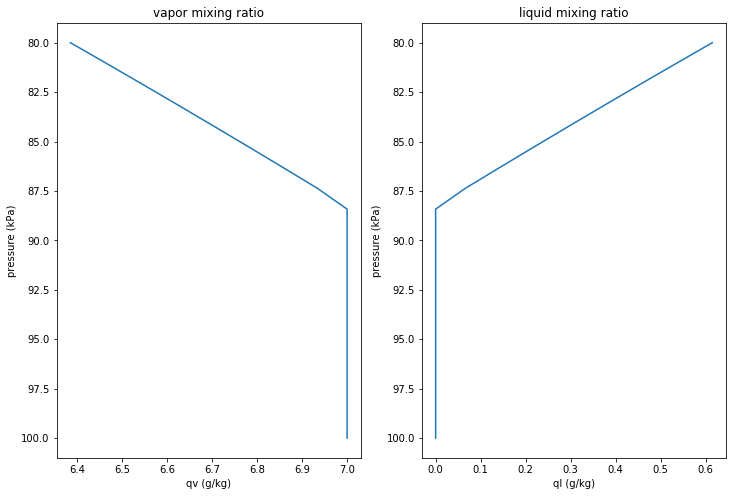

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(12,8))
ax0.plot(df_sounding['RV']*1.e3,press_levs)
ax0.invert_yaxis()
ax1.plot(df_sounding['RL']*1.e3,press_levs)
ax1.invert_yaxis()
ax0.set(title='vapor mixing ratio',xlabel='qv (g/kg)',ylabel='pressure (kPa)')
ax1.set(title='liquid mixing ratio',xlabel='ql (g/kg)',ylabel='pressure (kPa)');